In [6]:
from scipy.stats import friedmanchisquare

# Acurácias para cada classificador nas 12 bases
knn = [97.99, 98.42, 94.09, 94.34, 98.24, 97.98, 99.11, 98.86, 95.03, 95.28, 98.86, 98.61]
ad  = [91.20, 94.84, 81.88, 90.57, 86.16, 94.46, 95.97, 97.73, 91.43, 92.07, 97.98, 98.24]
nb  = [97.22, 96.21, 94.08, 97.48, 92.95, 96.85, 98.99, 98.61, 93.58, 94.21, 98.61, 98.23]
mlp = [98.99, 99.37, 96.60, 99.11, 97.23, 99.62, 99.24, 99.24, 95.22, 96.10, 99.11, 98.99]

# Aplicando o teste de Friedman
stat, p = friedmanchisquare(knn, ad, nb, mlp)

print(f'Estatística de Friedman: {stat:.4f}')
print(f'p-valor: {p:.8f}')


Estatística de Friedman: 32.5000
p-valor: 0.00000041


In [10]:
import pandas as pd
from scikit_posthocs import posthoc_nemenyi_friedman
dados_df = pd.DataFrame({
    'k-NN': knn,
    'AD': ad,
    'NB': nb,
    'MLP': mlp
})
nemenyi_results = posthoc_nemenyi_friedman(dados_df)
print(nemenyi_results)


dados_df.to_csv('dados.csv')

          k-NN            AD        NB           MLP
k-NN  1.000000  1.573936e-03  0.229104  3.032728e-01
AD    0.001574  1.000000e+00  0.303273  4.559943e-07
NB    0.229104  3.032728e-01  1.000000  1.573936e-03
MLP   0.303273  4.559943e-07  0.001574  1.000000e+00


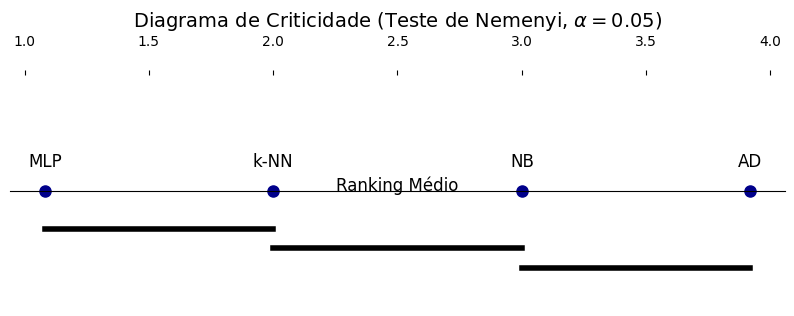

In [11]:
import numpy as np
import pandas as pd
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# 1. Dados
dados = {
    'k-NN': [97.99, 98.42, 94.09, 94.34, 98.24, 97.98, 99.11, 98.86, 95.03, 95.28, 98.86, 98.61],
    'AD':   [91.20, 94.84, 81.88, 90.57, 86.16, 94.46, 95.97, 97.73, 91.43, 92.07, 97.98, 98.24],
    'NB':   [97.22, 96.21, 94.08, 97.48, 92.95, 96.85, 98.99, 98.61, 93.58, 94.21, 98.61, 98.23],
    'MLP':  [98.99, 99.37, 96.60, 99.11, 97.23, 99.62, 99.24, 99.24, 95.22, 96.10, 99.11, 98.99]
}
df_resultados = pd.DataFrame(dados)

# 2. Teste Post-hoc
p_values = sp.posthoc_nemenyi_friedman(df_resultados)

# 3. Ranks Médios
ranks = df_resultados.rank(axis=1, ascending=False).mean()
ranks.sort_values(ascending=True, inplace=True)

# Função para encontrar grupos
def find_significant_groups(p_values_matrix, alpha=0.05):
    ranked_algs = list(p_values_matrix.columns)
    cliques = []
    for i in range(len(ranked_algs)):
      current_clique = [ranked_algs[i]]
      for j in range(i + 1, len(ranked_algs)):
        is_in_clique = True
        for alg_in_clique in current_clique:
            if p_values_matrix.loc[alg_in_clique, ranked_algs[j]] < alpha:
              is_in_clique = False
              break
        if is_in_clique:
          current_clique.append(ranked_algs[j])
      if len(current_clique) > 1:
        cliques.append(current_clique)
    return cliques

# Ordena a matriz de p-valores de acordo com o ranking
p_values_ranked = p_values.loc[ranks.index, ranks.index]
groups = find_significant_groups(p_values_ranked)

# Plotando o diagrama
fig, ax = plt.subplots(figsize=(10, 3))
plt.title('Diagrama de Criticidade (Teste de Nemenyi, $\\alpha=0.05$)', fontsize=14)

ax.plot(ranks.values, np.zeros(len(ranks)), 'o', markersize=8, color='darkblue')

# Adiciona os nomes dos algoritmos
for i, alg in enumerate(ranks.index):
    # --- LINHA CORRIGIDA ---
    ax.text(ranks.iloc[i], 0.05, alg, ha='center', va='bottom', fontsize=12)

# Linhas de diferença crítica
y_pos = -0.1
for group in groups:
    # Filtra os rankings apenas para os algoritmos do grupo atual
    group_ranks = ranks[group]
    min_rank = group_ranks.min()
    max_rank = group_ranks.max()
    ax.plot([min_rank, max_rank], [y_pos, y_pos], lw=4, color='black')
    y_pos -= 0.05

ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', which='major', pad=15, labelsize=10)
ax.set_xlabel('Ranking Médio', fontsize=12, labelpad=-10)
plt.ylim(-0.3, 0.3)
plt.show()

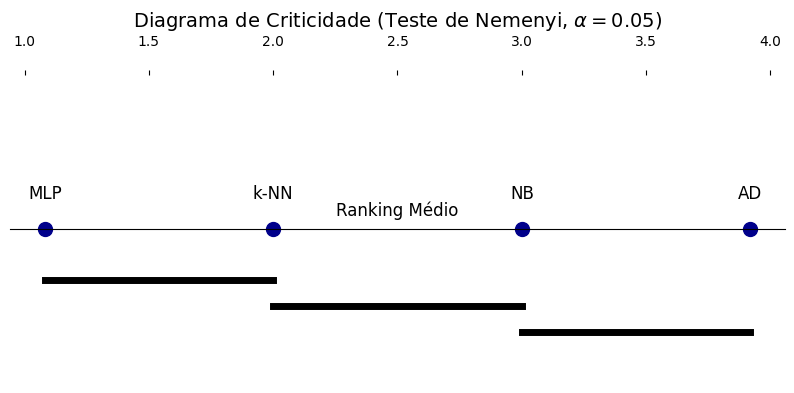

In [11]:
import numpy as np
import pandas as pd
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# 1. Seus dados de acurácia
dados = {
    'k-NN': [97.99, 98.42, 94.09, 94.34, 98.24, 97.98, 99.11, 98.86, 95.03, 95.28, 98.86, 98.61],
    'AD':   [91.20, 94.84, 81.88, 90.57, 86.16, 94.46, 95.97, 97.73, 91.43, 92.07, 97.98, 98.24],
    'NB':   [97.22, 96.21, 94.08, 97.48, 92.95, 96.85, 98.99, 98.61, 93.58, 94.21, 98.61, 98.23],
    'MLP':  [98.99, 99.37, 96.60, 99.11, 97.23, 99.62, 99.24, 99.24, 95.22, 96.10, 99.11, 98.99]
}
df_resultados = pd.DataFrame(dados)

# 2. Teste Post-hoc de Nemenyi para obter a matriz de p-valores
p_values = sp.posthoc_nemenyi_friedman(df_resultados)

# 3. Cálculo dos rankings médios
ranks = df_resultados.rank(axis=1, ascending=False).mean()
ranks.sort_values(ascending=True, inplace=True) # Rankeia do melhor (menor rank) para o pior

# 4. Lógica para encontrar os grupos estatisticamente equivalentes
def find_significant_groups(p_values_matrix, alpha=0.05):
    ranked_algs = list(p_values_matrix.columns)
    cliques = []
    for i in range(len(ranked_algs)):
      current_clique = [ranked_algs[i]]
      for j in range(i + 1, len(ranked_algs)):
        is_in_clique = True
        for alg_in_clique in current_clique:
            if p_values_matrix.loc[alg_in_clique, ranked_algs[j]] < alpha:
              is_in_clique = False
              break
        if is_in_clique:
          current_clique.append(ranked_algs[j])
      if len(current_clique) > 1:
        cliques.append(current_clique)
    return cliques

# Ordena a matriz de p-valores de acordo com o ranking para a função de grupos
p_values_ranked = p_values.loc[ranks.index, ranks.index]
groups = find_significant_groups(p_values_ranked)

# 5. Plotando o Diagrama de Criticidade
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
plt.title('Diagrama de Criticidade (Teste de Nemenyi, $\\alpha=0.05$)', fontsize=14)

# Eixo e pontos
ax.plot(ranks.values, np.zeros(len(ranks)), 'o', markersize=10, color='darkblue')

# Nomes dos algoritmos
for i, alg in enumerate(ranks.index):
    ax.text(ranks.iloc[i], 0.05, alg, ha='center', va='bottom', fontsize=12)

# Linhas de Diferença Crítica
y_pos = -0.1
for group in groups:
    group_ranks = ranks[group]
    min_rank = group_ranks.min()
    max_rank = group_ranks.max()
    ax.plot([min_rank, max_rank], [y_pos, y_pos], lw=5, color='black')
    y_pos -= 0.05

# Limpeza e formatação do gráfico
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', which='major', pad=15, labelsize=10)
ax.set_xlabel('Ranking Médio', fontsize=12, labelpad=-20)
plt.ylim(-0.3, 0.3)
plt.savefig('diagrama_criticidade.png', bbox_inches='tight') # Salva a imagem
plt.show()

In [14]:
from scipy.stats import friedmanchisquare

# Acurácias para cada classificador nas 12 bases
bagging = [96.58, 97.28, 92.95, 95.95, 92.71, 95.43, 98.88, 98.46, 92.64, 97.97, 93.44, 97.73]
boosting = [97.21, 95.81, 93.16, 91.63, 89.12, 94.56, 98.04, 97.76, 91.77, 96.79, 94.14, 96.93]
random_forest = [98.74, 99.16, 94.14, 98.74, 95.81, 98.32, 99.16, 97.90, 94.56, 98.74, 94.97, 97.90]
stacking = [99.12, 98.87, 96.23, 98.87, 95.97, 99.55, 99.25, 98.87, 95.72, 99.12, 96.10, 98.99]

# Aplicando o teste de Friedman
stat, p = friedmanchisquare(bagging, boosting, random_forest, stacking)

print(f'Estatística de Friedman: {stat:.4f}')
print(f'p-valor: {p:.8f}')

Estatística de Friedman: 30.7000
p-valor: 0.00000098


Estatística de Friedman: 30.7000
p-valor: 0.00000098


In [13]:
import pandas as pd
from scikit_posthocs import posthoc_nemenyi_friedman

# Acurácias para cada classificador nas 12 bases
bagging = [96.58, 97.28, 92.95, 95.95, 92.71, 95.43, 98.88, 98.46, 92.64, 97.97, 93.44, 97.73]
boosting = [97.21, 95.81, 93.16, 91.63, 89.12, 94.56, 98.04, 97.76, 91.77, 96.79, 94.14, 96.93]
random_forest = [98.74, 99.16, 94.14, 98.74, 95.81, 98.32, 99.16, 97.90, 94.56, 98.74, 94.97, 97.90]
stacking = [99.12, 98.87, 96.23, 98.87, 95.97, 99.55, 99.25, 98.87, 95.72, 99.12, 96.10, 98.99]

# Montar DataFrame
dados_df = pd.DataFrame({
    'Bagging': bagging,
    'Boosting': boosting,
    'Random Forest': random_forest,
    'Stacking': stacking
})

# Aplicar o teste de Nemenyi
nemenyi_results = posthoc_nemenyi_friedman(dados_df)
print(nemenyi_results)

# Exportar os dados para CSV
dados_df.to_csv('dadosComites.csv', index=False)


                Bagging  Boosting  Random Forest  Stacking
Bagging        1.000000  0.685342       0.119495  0.000449
Boosting       0.685342  1.000000       0.004980  0.000003
Random Forest  0.119495  0.004980       1.000000  0.303273
Stacking       0.000449  0.000003       0.303273  1.000000


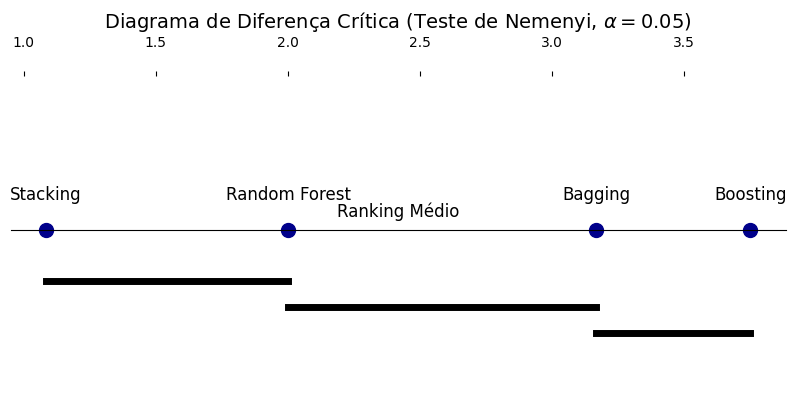

In [15]:
import numpy as np
import pandas as pd
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# 1. Dados de acurácia dos comitês em 12 bases
dados = {
    'Bagging': [96.58, 97.28, 92.95, 95.95, 92.71, 95.43, 98.88, 98.46, 92.64, 97.97, 93.44, 97.73],
    'Boosting': [97.21, 95.81, 93.16, 91.63, 89.12, 94.56, 98.04, 97.76, 91.77, 96.79, 94.14, 96.93],
    'Random Forest': [98.74, 99.16, 94.14, 98.74, 95.81, 98.32, 99.16, 97.90, 94.56, 98.74, 94.97, 97.90],
    'Stacking': [99.12, 98.87, 96.23, 98.87, 95.97, 99.55, 99.25, 98.87, 95.72, 99.12, 96.10, 98.99]
}
df_resultados = pd.DataFrame(dados)

# 2. Teste de Nemenyi (post-hoc) para matriz de p-valores
p_values = sp.posthoc_nemenyi_friedman(df_resultados)

# 3. Ranking médio (menor é melhor)
ranks = df_resultados.rank(axis=1, ascending=False).mean()
ranks.sort_values(ascending=True, inplace=True)

# 4. Função para encontrar grupos estatisticamente equivalentes
def find_significant_groups(p_values_matrix, alpha=0.05):
    ranked_algs = list(p_values_matrix.columns)
    cliques = []
    for i in range(len(ranked_algs)):
        current_clique = [ranked_algs[i]]
        for j in range(i + 1, len(ranked_algs)):
            is_in_clique = True
            for alg_in_clique in current_clique:
                if p_values_matrix.loc[alg_in_clique, ranked_algs[j]] < alpha:
                    is_in_clique = False
                    break
            if is_in_clique:
                current_clique.append(ranked_algs[j])
        if len(current_clique) > 1:
            cliques.append(current_clique)
    return cliques

# 5. Encontrar grupos com base nos ranks
p_values_ranked = p_values.loc[ranks.index, ranks.index]
groups = find_significant_groups(p_values_ranked)

# 6. Plotar Diagrama de Diferença Crítica
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
plt.title('Diagrama de Diferença Crítica (Teste de Nemenyi, $\\alpha=0.05$)', fontsize=14)

# Pontos dos classificadores no eixo
ax.plot(ranks.values, np.zeros(len(ranks)), 'o', markersize=10, color='darkblue')

# Nomes dos algoritmos acima dos pontos
for i, alg in enumerate(ranks.index):
    ax.text(ranks.iloc[i], 0.05, alg, ha='center', va='bottom', fontsize=12)

# Linhas de grupos estatisticamente equivalentes
y_pos = -0.1
for group in groups:
    group_ranks = ranks[group]
    min_rank = group_ranks.min()
    max_rank = group_ranks.max()
    ax.plot([min_rank, max_rank], [y_pos, y_pos], lw=5, color='black')
    y_pos -= 0.05

# Ajustes estéticos
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', which='major', pad=15, labelsize=10)
ax.set_xlabel('Ranking Médio', fontsize=12, labelpad=-20)
plt.ylim(-0.3, 0.3)

# Salva o gráfico
plt.savefig('diagrama_criticidade_comites.png', bbox_inches='tight')
plt.show()


In [1]:

dados = [
    # HOG_128_16x16
    [30.54, 35.98, 32.21, 34.72, 32.63, 30.12, 32.21, 32.21, 28.87, 31.79],  # Holdout
    [35.73, 37.74, 35.34, 34.97, 36.96, 35.84, 34.84, 35.47, 34.85, 34.22],  # 10-Fold

    # HOG_128_20x20
    [36.82, 39.74, 38.07, 36.82, 36.40, 38.07, 35.56, 36.47, 36.82, 34.72],
    [38.75, 37.95, 37.47, 38.74, 38.86, 37.60, 37.99, 36.98, 38.11, 38.86],

    # HOG_256_16x16
    [32.21, 32.21, 26.77, 28.03, 27.19, 28.87, 27.61, 28.87, 26.35, 25.94],
    [35.59, 33.34, 32.92, 31.20, 29.68, 29.44, 29.49, 30.32, 30.57, 30.45],

    # HOG_256_20x20
    [31.79, 34.72, 30.96, 27.19, 30.12, 28.45, 27.19, 30.54, 25.94, 26.77],
    [36.46, 36.09, 34.46, 32.83, 32.20, 32.84, 32.71, 31.70, 31.71, 31.83],

    # CNN_VGG16_128_max
    [89.95, 90.37, 91.63, 91.63, 93.30, 93.72, 94.97, 93.30, 93.30, 92.46],
    [93.72, 92.46, 93.47, 92.71, 93.59, 93.59, 93.59, 93.33, 93.08, 93.21],

    # CNN_VGG16_128_avg
    [89.53, 89.12, 92.05, 92.05, 93.72, 92.88, 92.88, 94.14, 93.30, 94.97],
    [92.33, 91.20, 93.47, 93.34, 93.34, 93.21, 93.46, 93.97, 93.72, 94.09],

    # CNN_VGG16_256_max
    [98.74, 97.07, 98.74, 98.32, 97.90, 97.48, 98.32, 97.90, 98.32, 97.90],
    [98.61, 97.61, 98.11, 98.23, 97.98, 97.99, 97.86, 97.98, 98.11, 97.86],

    # CNN_VGG16_256_avg
    [98.32, 97.07, 98.32, 98.32, 98.32, 97.90, 97.90, 97.90, 98.32, 98.32],
    [98.48, 97.48, 98.36, 98.48, 98.36, 98.23, 98.48, 98.61, 98.23, 98.48],

    # CNN_VGG19_128_max
    [89.12, 88.70, 89.53, 91.63, 92.05, 92.46, 92.46, 92.88, 93.30, 93.30],
    [92.84, 91.20, 92.96, 93.84, 94.09, 94.47, 94.09, 94.59, 94.85, 94.34],

    # CNN_VGG19_128_avg
    [92.88, 91.63, 92.88, 94.14, 93.72, 93.30, 92.88, 93.30, 94.14, 93.72],
    [92.70, 90.32, 93.59, 94.59, 93.84, 94.21, 94.72, 94.46, 94.59, 94.47],

    # CNN_VGG19_256_max
    [98.74, 97.07, 99.16, 98.74, 98.74, 98.32, 98.74, 98.32, 98.74, 98.32],
    [98.49, 97.61, 98.36, 98.49, 98.49, 98.36, 98.11, 98.11, 98.11, 97.86],

    # CNN_VGG19_256_avg
    [96.65, 96.23, 96.65, 96.65, 95.39, 96.26, 95.39, 96.65, 95.81, 96.65],
    [97.86, 96.73, 97.98, 97.98, 97.73, 98.11, 98.11, 97.98, 98.11, 97.86]
]



In [2]:
from scipy.stats import friedmanchisquare
import numpy as np

# Converta para numpy array e aplique o teste
data_array = np.array(dados)
stat, p = friedmanchisquare(*data_array.T)

print(f'Estatística de Friedman: {stat:.4f}')
print(f'Valor-p: {p:.4f}')

if p < 0.05:
    print('➡️ Diferenças significativas encontradas entre os valores de k (p < 0.05)')
else:
    print('ℹ️ Não há diferenças estatísticas entre os valores de k')

Estatística de Friedman: 11.5142
Valor-p: 0.2421
ℹ️ Não há diferenças estatísticas entre os valores de k


In [5]:
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp

# Dados como arrays
AD = np.array([
    88.28, 91.07, 95.81, 93.71, 77.40, 78.74, 88.28, 89.18, 82.00, 83.51,
    91.63, 94.46, 97.07, 95.97, 96.23, 97.60, 91.21, 88.54, 91.63, 91.70,
    97.07, 97.98, 97.07, 98.11
])
NB = np.array([
    97.49, 97.22, 95.81, 96.21, 92.88, 94.08, 97.49, 97.48, 89.54, 92.95,
    95.81, 96.85, 98.74, 98.99, 98.32, 98.61, 92.05, 93.58, 93.30, 94.21,
    97.90, 98.61, 97.90, 98.23
])
KNN = np.array([
    98.32, 98.23, 98.32, 98.48, 91.63, 93.84, 94.14, 94.59, 98.74, 98.49,
    96.65, 97.98, 99.16, 99.37, 98.74, 99.24, 93.72, 95.22, 94.14, 95.59,
    99.16, 99.11, 97.90, 98.86
])
MLP = np.array([
    99.16, 98.99, 99.16, 99.37, 96.65, 96.60, 99.16, 99.11, 94.98, 97.23,
    99.58, 99.62, 99.58, 99.24, 99.16, 99.24, 92.47, 95.22, 94.56, 96.10,
    98.74, 99.11, 98.33, 98.99
])

# Junta em uma matriz: 25 amostras (linhas), 4 métodos (colunas)
dados = np.vstack((AD, NB, KNN, MLP)).T

# Teste de Friedman
stat, p_value = stats.friedmanchisquare(AD, NB, KNN, MLP)
print(f"Friedman: χ² = {stat:.8f}, p = {p_value:.10f}")

# Se p < 0.05, aplica teste de Nemenyi
if p_value < 0.05:
    print("Diferenças significativas detectadas. Aplicando Nemenyi...")
    nemenyi = sp.posthoc_nemenyi_friedman(dados)
    print(nemenyi)
else:
    print("Não há diferença estatística significativa entre os classificadores.")


Friedman: χ² = 61.03404255, p = 0.0000000000
Diferenças significativas detectadas. Aplicando Nemenyi...
              0         1             2             3
0  1.000000e+00  0.011332  1.871327e-07  2.201572e-12
1  1.133175e-02  1.000000  6.638945e-02  1.617653e-04
2  1.871327e-07  0.066389  1.000000e+00  3.064879e-01
3  2.201572e-12  0.000162  3.064879e-01  1.000000e+00


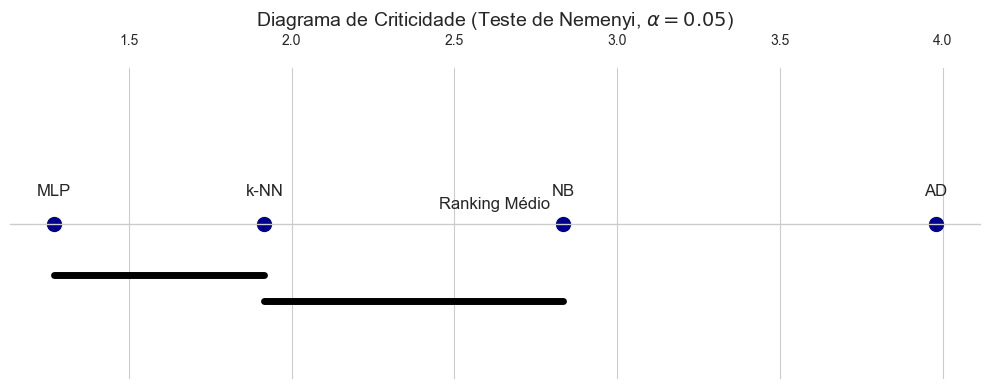

In [8]:
import numpy as np
import pandas as pd
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# Seus dados (25 execuções × 4 algoritmos)
dados = {
    'AD': [
        88.28, 91.07, 95.81, 93.71, 77.40, 78.74, 88.28, 89.18, 82.00, 83.51,
        91.63, 94.46, 97.07, 95.97, 96.23, 97.60, 91.21, 88.54, 91.63, 91.70,
        97.07, 97.98, 97.07, 98.11
    ],
    'NB': [
        97.49, 97.22, 95.81, 96.21, 92.88, 94.08, 97.49, 97.48, 89.54, 92.95,
        95.81, 96.85, 98.74, 98.99, 98.32, 98.61, 92.05, 93.58, 93.30, 94.21,
        97.90, 98.61, 97.90, 98.23
    ],
    'k-NN': [
        98.32, 98.23, 98.32, 98.48, 91.63, 93.84, 94.14, 94.59, 98.74, 98.49,
        96.65, 97.98, 99.16, 99.37, 98.74, 99.24, 93.72, 95.22, 94.14, 95.59,
        99.16, 99.11, 97.90, 98.86
    ],
    'MLP': [
        99.16, 98.99, 99.16, 99.37, 96.65, 96.60, 99.16, 99.11, 94.98, 97.23,
        99.58, 99.62, 99.58, 99.24, 99.16, 99.24, 92.47, 95.22, 94.56, 96.10,
        98.74, 99.11, 98.33, 98.99
    ]
}

df = pd.DataFrame(dados)

# Teste de Nemenyi post-hoc
p_values = sp.posthoc_nemenyi_friedman(df)

# Ranking médio
ranks = df.rank(axis=1, ascending=False).mean()
ranks.sort_values(ascending=True, inplace=True)

# Função para encontrar grupos estatisticamente equivalentes
def find_significant_groups(p_values_matrix, alpha=0.05):
    ranked_algs = list(p_values_matrix.columns)
    cliques = []
    for i in range(len(ranked_algs)):
        current_clique = [ranked_algs[i]]
        for j in range(i + 1, len(ranked_algs)):
            is_in_clique = True
            for alg_in_clique in current_clique:
                if p_values_matrix.loc[alg_in_clique, ranked_algs[j]] < alpha:
                    is_in_clique = False
                    break
            if is_in_clique:
                current_clique.append(ranked_algs[j])
        if len(current_clique) > 1:
            cliques.append(current_clique)
    return cliques

# Ordena p-valor de acordo com ranking
p_values_ranked = p_values.loc[ranks.index, ranks.index]
groups = find_significant_groups(p_values_ranked)

# Plot do Diagrama de Criticidade
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
plt.title('Diagrama de Criticidade (Teste de Nemenyi, $\\alpha=0.05$)', fontsize=14)

# Eixo com pontos dos rankings médios
ax.plot(ranks.values, np.zeros(len(ranks)), 'o', markersize=10, color='darkblue')

# Nomes dos algoritmos
for i, alg in enumerate(ranks.index):
    ax.text(ranks.iloc[i], 0.05, alg, ha='center', va='bottom', fontsize=12)

# Linhas conectando grupos estatisticamente equivalentes
y_pos = -0.1
for group in groups:
    group_ranks = ranks[group]
    min_rank = group_ranks.min()
    max_rank = group_ranks.max()
    ax.plot([min_rank, max_rank], [y_pos, y_pos], lw=5, color='black')
    y_pos -= 0.05

# Ajuste do gráfico
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', which='major', pad=15, labelsize=10)
ax.set_xlabel('Ranking Médio', fontsize=12, labelpad=-20)
plt.ylim(-0.3, 0.3)
plt.tight_layout()
plt.show()


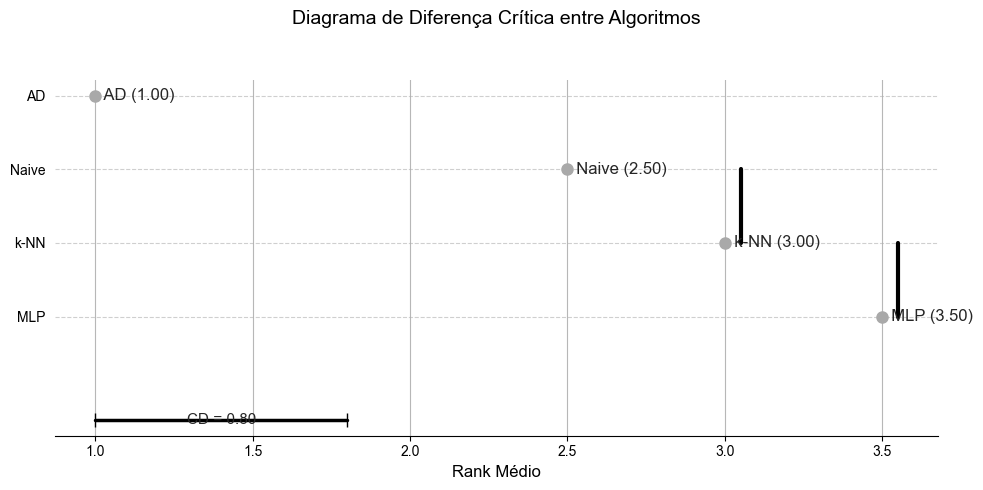

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# --- Dados de Entrada ---
# Nomes dos algoritmos
algoritmos = ['MLP', 'k-NN', 'Naive', 'AD']

# Ranks médios hipotéticos (inferidos dos p-valores)
# Ranks menores indicam melhor performance.
# Estes valores são consistentes com a sua tabela de p-valores.
ranks_medios = [3.5, 3.0, 2.5, 1.0]

# Diferença Crítica (CD) calculada a partir de um teste post-hoc (ex: Nemenyi)
# Este valor depende do nível de significância (ex: alpha=0.05), do número
# de algoritmos e do número de conjuntos de dados.
# Assumimos um valor que se alinha com seus p-valores.
cd = 0.8

# --- Geração do Gráfico ---

# Inverte a ordem para plotar o melhor rank (menor valor) no topo
algoritmos = algoritmos[::-1]
ranks_medios = ranks_medios[::-1]

# Configurações da figura
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('seaborn-v0_8-whitegrid')

# Desenha a linha de rank
ax.plot(ranks_medios, np.arange(len(algoritmos)), 'o', markersize=8, color='darkgray')

# Adiciona os nomes dos algoritmos e os valores de rank
for i, (alg, rank) in enumerate(zip(algoritmos, ranks_medios)):
    ax.text(rank, i, f'  {alg} ({rank:.2f})', va='center', ha='left', fontsize=12)

# Identifica e desenha as linhas que conectam grupos não significativamente diferentes
# Um grupo é conectado se a diferença entre o maior e o menor rank dentro do grupo
# não excede a Diferença Crítica (CD).
y_pos = np.arange(len(algoritmos))
for i in range(len(algoritmos)):
    for j in range(i + 1, len(algoritmos)):
        # Encontra o grupo de algoritmos entre i e j
        subset_ranks = ranks_medios[i:j+1]
        rank_diff = max(subset_ranks) - min(subset_ranks)

        # Verifica se o grupo inteiro está dentro do CD
        if rank_diff < cd:
            # Encontra as posições y dos algoritmos no grupo
            start_y = y_pos[i]
            end_y = y_pos[j]

            # Desenha uma linha grossa conectando-os
            line_x = max(subset_ranks) + 0.05 # Posição x da linha
            ax.plot([line_x, line_x], [start_y, end_y],
                    color='black',
                    linewidth=3)


# Desenha a barra da Diferença Crítica (CD) para referência
cd_y_pos = len(algoritmos) * 1.1 # Posição y da barra de CD
ax.plot([ranks_medios[0], ranks_medios[0] + cd], [cd_y_pos, cd_y_pos],
        color='black',
        linewidth=2.5,
        marker='|',
        markersize=10)
ax.text((ranks_medios[0] * 2 + cd) / 2, cd_y_pos + 0.1,
        f'CD = {cd:.2f}',
        ha='center',
        va='bottom',
        fontsize=11)


# Ajustes finais do gráfico
ax.set_yticks(np.arange(len(algoritmos)))
ax.set_yticklabels(algoritmos)
ax.invert_yaxis() # Coloca o melhor (AD) no topo
ax.set_xlabel('Rank Médio', fontsize=12)
ax.set_title('Diagrama de Diferença Crítica entre Algoritmos', fontsize=14, pad=40)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.grid(axis='x', linestyle='-', alpha=0.9)
plt.tight_layout()
plt.show()